In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [116]:
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [118]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [119]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [120]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [121]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [122]:
df.duplicated().sum()

0

In [123]:
df.rename(columns={'Na_to_K' : 'Sodium_to_Potassium', 'BP' : 'Blood_Pressure'}, inplace=True)
df['Sex'].replace({'M':'Male', 'F':'Female'}, inplace=True)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype(int)

In [124]:
age_values = df['Age'].value_counts()
top_age = age_values.head(5)
df_top_age = pd.DataFrame({'Age' : top_age.index, 'Count' : top_age.values})
df_top_age

,Age,Count
0,47,8
1,49,7
2,23,7
3,28,7
4,39,6


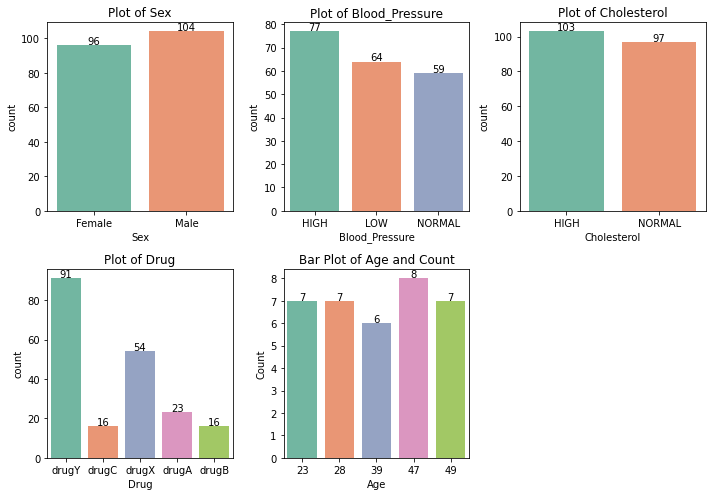

In [125]:
def create_plot(ax, x, data, plot_type = "count", y=None, palette = "Set2"):
    if plot_type == 'count':
        sns.countplot(x = x, data = data, palette = palette, ax = ax)
    elif plot_type == "bar":
        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)

    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline',
                    fontsize=10, color='black',
                    xytext=(0, 1),
                    textcoords = 'offset points')
#Create the figure and subplots
plt.figure(figsize=(10, 10))

#Define plot configurations
plot_configs = [
    {'x': 'Sex', 'data': df, 'plot_type': 'count'},
    {'x': 'Blood_Pressure', 'data': df, 'plot_type': 'count'},
    {'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},
    {'x': 'Drug', 'data': df, 'plot_type' : 'count'},
    {'x': 'Age', 'y': 'Count', 'data': df_top_age, 'plot_type': 'bar'}
]
#Loop through plot configurations to create subplots
for i, config in enumerate (plot_configs):
    ax = plt.subplot(3, 3, i + 1)
    create_plot(ax, **config)

plt.tight_layout()
plt.show()

#Giới tính và cholesterol có sự phân bố khá đồng đều.
#Huyết áp cao và cholesterol cao chiếm tỉ lệ lớn trong tập dữ liệu, có thể phản ánh các vấn đề sức khỏe phổ biến trong nhóm bệnh nhân này.
#DrugY và DrugX là hai loại thuốc được sử dụng phổ biến nhất, với DrugY được kê đơn cho hầu hết bệnh nhân.

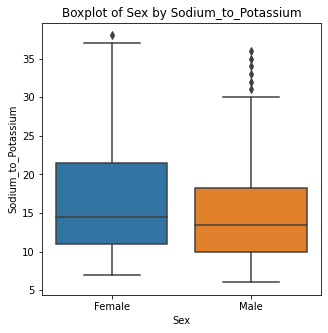

In [126]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df)
plt.title('Boxplot of Sex by Sodium_to_Potassium')
plt.show()

#mức Sodium_to_Potassium ở nam có nhiều biến động hơn (có nhiều giá trị ngoại biên), trong khi nữ giới có trung bình cao hơn và ít giá trị ngoại biên hơn.

In [127]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [128]:
#OneHot Encoder
onehot_encoder_sex = OneHotEncoder(sparse=False)
one_hot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names(['Sex']))
X = pd.concat([X, one_hot_df], axis=1)
X = X.drop('Sex', axis=1) # Drop the original categorical columns
# Labelled encoder
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure'])
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [130]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)
dtc

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [131]:
dtc.fit(X_train, y_train)
print(dtc.classes_)

['drugA' 'drugB' 'drugC' 'drugX' 'drugY']


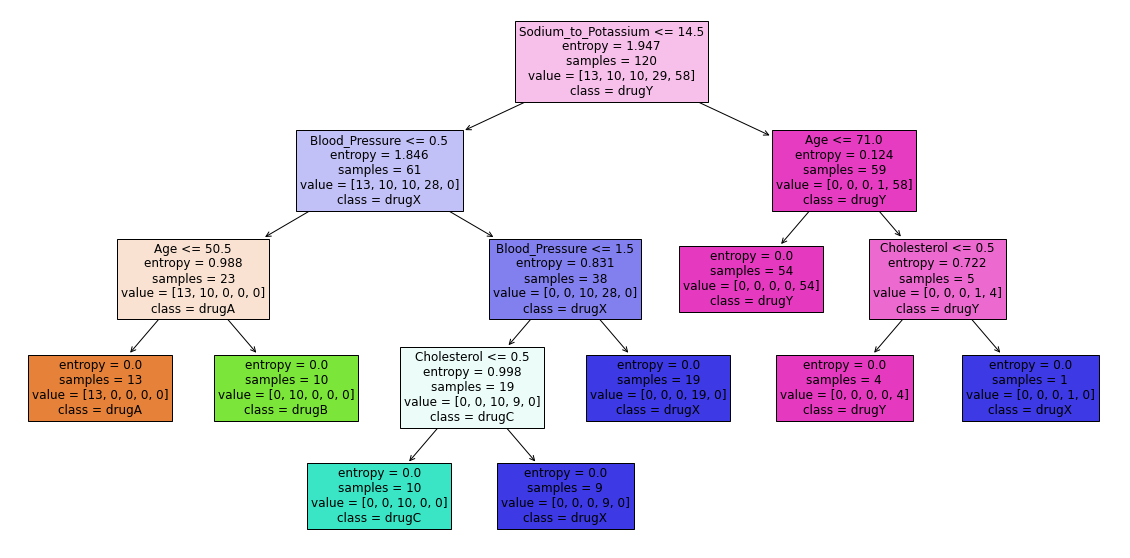

In [132]:
from sklearn.tree import plot_tree
feature_cols = X_train.columns
plt.figure(figsize=(20,10))
plot_tree(dtc, class_names=dtc.classes_, feature_names=feature_cols, fontsize=12, filled=True)
plt.show()

In [133]:
y_pred = dtc.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix')
print(conf_matrix)

Accuracy: 0.9875

Confusion Matrix
[[10  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  1 32]]


In [134]:
from sklearn.metrics import classification_report
target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       0.96      1.00      0.98        25
       drugY       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [136]:
# Giả sử mô hình dtc đã được huấn luyện từ trước

# Hàm để lấy dữ liệu đầu vào từ người dùng
def get_user_input():
    Age = int(input("Nhập tuổi (Age): "))
    Blood_Pressure = input("Nhập mức huyết áp (Blood_Pressure: 'LOW', 'NORMAL', 'HIGH'): ")
    Cholesterol = input("Nhập mức Cholesterol (Cholesterol: 'NORMAL', 'HIGH'): ")
    Sodium_to_Potassium = float(input("Nhập chỉ số Sodium_to_Potassium: "))
    Sex = input("Nhập giới tính (Sex: 'Male', 'Female'): ")
    
    # Tạo dataframe với dữ liệu người dùng
    user_data = pd.DataFrame({
        'Age': [Age],
        'Blood_Pressure': [Blood_Pressure],
        'Cholesterol': [Cholesterol],
        'Sodium_to_Potassium': [Sodium_to_Potassium],
        'Sex': [Sex]
    })
    
    return user_data

# Tiền xử lý dữ liệu như đã làm với tập dữ liệu ban đầu
def preprocess_user_data(user_data):
    # OneHotEncoder cho cột Sex (sử dụng encoder đã được huấn luyện)
    one_hot_encoded = onehot_encoder_sex.transform(user_data[['Sex']])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names(['Sex']))

    # Kết hợp dữ liệu mới được mã hóa với dữ liệu hiện có
    user_data = pd.concat([user_data, one_hot_df], axis=1)

    # Loại bỏ cột Sex gốc
    user_data = user_data.drop('Sex', axis=1)
    
    # LabelEncoder cho các cột Blood_Pressure và Cholesterol
    labelled_encoder_blood_pressure = LabelEncoder()
    labelled_encoder_cholesterol = LabelEncoder()
    user_data['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(user_data['Blood_Pressure'])
    user_data['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(user_data['Cholesterol'])
    
    return user_data

# Nhận dữ liệu từ người dùng
user_data = get_user_input()

# Tiền xử lý dữ liệu người dùng
user_data_preprocessed = preprocess_user_data(user_data)

# Dự đoán loại thuốc từ mô hình
predicted_drug = dtc.predict(user_data_preprocessed)

# In ra loại thuốc được dự đoán
print(f"Loại thuốc được cấp: {predicted_drug[0]}")

Loại thuốc được cấp: drugA


[0.725, 0.85, 0.925, 0.9, 1.0, 1.0, 0.9875, 0.9875, 0.9875]


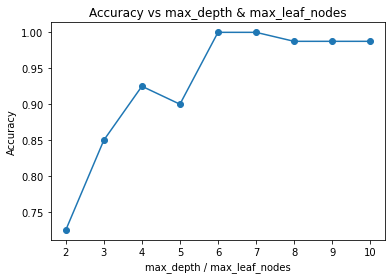

In [114]:
accuracies = []

for i in range(2,11):
  # Chia tập dữ liệu thành train và test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
  # Tạo mô hình DecisionTreeClassifier với max_depth và max_leaf_nodes thay đổi
  dtc = DecisionTreeClassifier(criterion='entropy', max_depth=i, max_leaf_nodes=i)
    
  # Huấn luyện mô hình
  dtc.fit(X_train, y_train)
    
  # Dự đoán trên tập kiểm tra
  y_pred = dtc.predict(X_test)
    
  # Tính độ chính xác
  accuracy = metrics.accuracy_score(y_test, y_pred)
    
  # Lưu lại độ chính xác
  accuracies.append(accuracy)

# Hiển thị danh sách các độ chính xác
print(accuracies)

# Vẽ biểu đồ sự thay đổi của độ chính xác theo max_depth và max_leaf_nodes
plt.plot(range(2, 11), accuracies, marker='o')
plt.xlabel('max_depth / max_leaf_nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth & max_leaf_nodes')
plt.show()

In [137]:
# Giả sử mô hình dtc đã được huấn luyện từ trước

# Hàm để lấy dữ liệu đầu vào từ người dùng
def get_user_input():
    Age = int(input("Nhập tuổi (Age): "))
    Blood_Pressure = input("Nhập mức huyết áp (Blood_Pressure: 'LOW', 'NORMAL', 'HIGH'): ")
    Cholesterol = input("Nhập mức Cholesterol (Cholesterol: 'NORMAL', 'HIGH'): ")
    Sodium_to_Potassium = float(input("Nhập chỉ số Sodium_to_Potassium: "))
    Sex = input("Nhập giới tính (Sex: 'Male', 'Female'): ")
    
    # Tạo dataframe với dữ liệu người dùng
    user_data = pd.DataFrame({
        'Age': [Age],
        'Blood_Pressure': [Blood_Pressure],
        'Cholesterol': [Cholesterol],
        'Sodium_to_Potassium': [Sodium_to_Potassium],
        'Sex': [Sex]
    })
    
    return user_data

# Tiền xử lý dữ liệu như đã làm với tập dữ liệu ban đầu
def preprocess_user_data(user_data):
    # OneHotEncoder cho cột Sex (sử dụng encoder đã được huấn luyện)
    one_hot_encoded = onehot_encoder_sex.transform(user_data[['Sex']])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex']))

    # Kết hợp dữ liệu mới được mã hóa với dữ liệu hiện có
    user_data = pd.concat([user_data, one_hot_df], axis=1)

    # Loại bỏ cột Sex gốc
    user_data = user_data.drop('Sex', axis=1)
    
    # LabelEncoder cho các cột Blood_Pressure và Cholesterol
    labelled_encoder_blood_pressure = LabelEncoder()
    labelled_encoder_cholesterol = LabelEncoder()
    user_data['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(user_data['Blood_Pressure'])
    user_data['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(user_data['Cholesterol'])
    
    return user_data

# Nhận dữ liệu từ người dùng
user_data = get_user_input()

# Tiền xử lý dữ liệu người dùng
user_data_preprocessed = preprocess_user_data(user_data)

# Dự đoán loại thuốc từ mô hình
predicted_drug = dtc.predict(user_data_preprocessed)

# In ra loại thuốc được dự đoán
print(f"Loại thuốc được cấp: {predicted_drug[0]}")

ValueError: invalid literal for int() with base 10: ''

[0.725, 0.85, 0.925, 0.9, 1.0, 1.0, 0.9875, 0.9875, 0.9875]


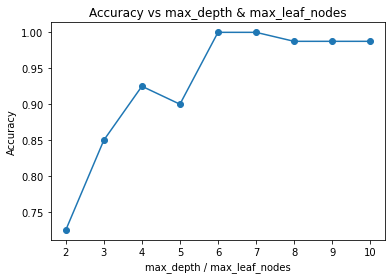

In [138]:
accuracies = []

for i in range(2,11):
  # Chia tập dữ liệu thành train và test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
  # Tạo mô hình DecisionTreeClassifier với max_depth và max_leaf_nodes thay đổi
  dtc = DecisionTreeClassifier(criterion='entropy', max_depth=i, max_leaf_nodes=i)
    
  # Huấn luyện mô hình
  dtc.fit(X_train, y_train)
    
  # Dự đoán trên tập kiểm tra
  y_pred = dtc.predict(X_test)
    
  # Tính độ chính xác
  accuracy = metrics.accuracy_score(y_test, y_pred)
    
  # Lưu lại độ chính xác
  accuracies.append(accuracy)

# Hiển thị danh sách các độ chính xác
print(accuracies)

# Vẽ biểu đồ sự thay đổi của độ chính xác theo max_depth và max_leaf_nodes
plt.plot(range(2, 11), accuracies, marker='o')
plt.xlabel('max_depth / max_leaf_nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth & max_leaf_nodes')
plt.show()

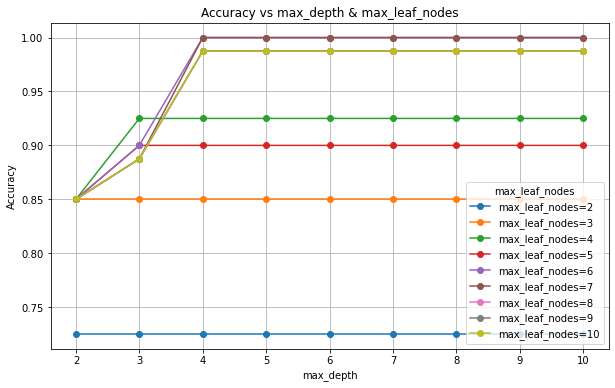

In [139]:
accuraciesParent = []

# Vòng lặp qua từng giá trị max_leaf_nodes
for i in range(2, 11):
    accuraciesChild = []
    # Vòng lặp qua từng giá trị max_depth
    for j in range(2, 11):
        # Chia tập dữ liệu thành train và test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Tạo mô hình DecisionTreeClassifier với max_depth và max_leaf_nodes thay đổi
        dtc = DecisionTreeClassifier(criterion='entropy', max_depth=j, max_leaf_nodes=i)
        
        # Huấn luyện mô hình
        dtc.fit(X_train, y_train)
        
        # Dự đoán trên tập kiểm tra
        y_pred = dtc.predict(X_test)
        
        # Tính độ chính xác
        accuracy = metrics.accuracy_score(y_test, y_pred)
        
        # Lưu lại độ chính xác
        accuraciesChild.append(accuracy)

    # Lưu lại kết quả cho mỗi max_leaf_nodes
    accuraciesParent.append(accuraciesChild)

# Chuyển accuraciesParent thành numpy array để dễ xử lý khi vẽ biểu đồ
accuraciesParent = np.array(accuraciesParent)

# Vẽ biểu đồ sự thay đổi của độ chính xác theo max_depth và max_leaf_nodes
plt.figure(figsize=(10, 6))

# Vẽ mỗi đường tương ứng với mỗi giá trị max_leaf_nodes
for i in range(2, 11):
    plt.plot(range(2, 11), accuraciesParent[i-2], label=f'max_leaf_nodes={i}', marker='o')

# Thêm các yếu tố đồ họa
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth & max_leaf_nodes')
plt.legend(title='max_leaf_nodes')
plt.grid(True)
plt.show()

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 1. C4.5: Criterion sử dụng entropy (mô phỏng C4.5)
c45_model = DecisionTreeClassifier(criterion='entropy')
c45_model.fit(X_train, y_train)
c45_pred = c45_model.predict(X_test)
c45_accuracy = metrics.accuracy_score(y_test, c45_pred)

# 2. CART: Criterion sử dụng gini
cart_model = DecisionTreeClassifier(criterion='gini')
cart_model.fit(X_train, y_train)
cart_pred = cart_model.predict(X_test)
cart_accuracy = metrics.accuracy_score(y_test, cart_pred)

# 3. ID3: Cũng sử dụng entropy
id3_model = DecisionTreeClassifier(criterion='entropy')
id3_model.fit(X_train, y_train)
id3_pred = id3_model.predict(X_test)
id3_accuracy = metrics.accuracy_score(y_test, id3_pred)

# So sánh độ chính xác
print(f'Accuracy of C4.5 (entropy): {c45_accuracy}')
print(f'Accuracy of CART (gini): {cart_accuracy}')
print(f'Accuracy of ID3 (entropy): {id3_accuracy}')

Accuracy of C4.5 (entropy): 0.9875
Accuracy of CART (gini): 0.9875
Accuracy of ID3 (entropy): 0.9875
